# GAN Training

## Importing Libraries

In [0]:
# tensorflow 1.0 version 사용
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:


from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [0]:


import sys
sys.path.append('/drive/My Drive/Colab Notebooks/Lecture')

In [0]:
import os
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari


Using TensorFlow backend.


In [0]:
# run params
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'camel'

RUN_FOLDER = '/drive/My Drive/Colab Notebooks/Lecture/run/{}/'.format(SECTION)
#RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## 데이터 적재

*

In [0]:
# Loading camel data
#(x_train, y_train) = load_safari(DATA_NAME)
(x_train, y_train) = load_safari('/drive/My Drive/Colab Notebooks/Lecture/data/camel')

In [0]:
x_train.shape

(80000, 28, 28, 1)

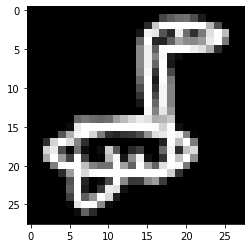

In [0]:
plt.imshow(x_train[200,:,:,0], cmap = 'gray')

## 모델 만들기

In [0]:
gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2,2, 1, 1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004
        , optimiser = 'rmsprop'
        , z_dim = 100
        )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
gan.discriminator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0   

In [0]:
gan.generator.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_1 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_5 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 14, 14, 128)       2049

## 모델 훈련

* PRINT_EVERY_N_BATCHES 에포크마다 생성된 샘플 이미지가 `run/gan/0001_camel/images` 폴더에 저장됨.*

In [0]:
BATCH_SIZE = 64
#EPOCHS = 6000
EPOCHS = 1000
PRINT_EVERY_N_BATCHES = 5

In [0]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: (0.728)(R 0.693, F 0.762)] [D acc: (0.266)(0.531, 0.000)] [G loss: 0.687] [G acc: 1.000]


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: (0.710)(R 0.620, F 0.800)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.601] [G acc: 1.000]
2 [D loss: (2.342)(R 0.514, F 4.170)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.608] [G acc: 1.000]
3 [D loss: (0.650)(R 0.605, F 0.694)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.579] [G acc: 1.000]
4 [D loss: (0.641)(R 0.588, F 0.693)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.532] [G acc: 1.000]
5 [D loss: (0.632)(R 0.556, F 0.707)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.474] [G acc: 1.000]
6 [D loss: (0.613)(R 0.500, F 0.727)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.389] [G acc: 1.000]
7 [D loss: (0.637)(R 0.423, F 0.851)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.347] [G acc: 1.000]
8 [D loss: (0.630)(R 0.387, F 0.872)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.333] [G acc: 1.000]
9 [D loss: (0.684)(R 0.359, F 1.009)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.396] [G acc: 1.000]
10 [D loss: (0.685)(R 0.390, F 0.980)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.455] [G acc: 1.000]

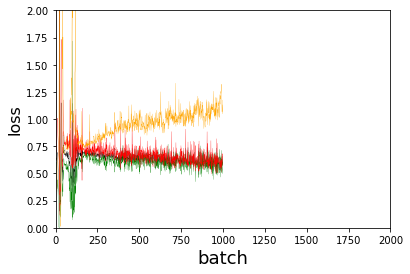

In [0]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[0] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
plt.ylim(0, 2)

plt.show()

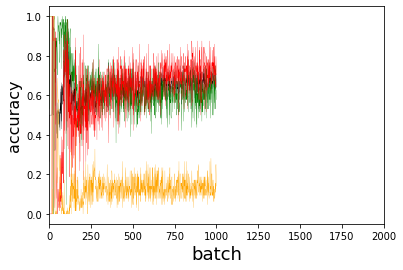

In [0]:
fig = plt.figure()
plt.plot([x[3] for x in gan.d_losses], color='black', linewidth=0.25)
plt.plot([x[4] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[5] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)

plt.xlim(0, 2000)

plt.show()

#### 에포크 20
![20](run/gan/0001_camel/images/sample_20.png)

#### 에포크 200
![200](run/gan/0001_camel/images/sample_200.png)

#### 에포크 400
![400](run/gan/0001_camel/images/sample_400.png)

#### 에포크 1000
![1000](run/gan/0001_camel/images/sample_1000.png)

#### 에포크 2000
![2000](run/gan/0001_camel/images/sample_2000.png)